# Nivell 1



## Exercici 1

Crea almenys tres models de regressió diferents per intentar predir el millor possible l’endarreriment dels vols (ArrDelay) de DelayedFlights.csv.








El dataset és un dataframe sobre vols en EEUU durant el 2008 que conentenen les següents variables:

* YEAR — Year in which flight took place
* QUARTER — Quarter in which flight took place (1–4)
* MONTH — Month in which flight took place (1–12)
* DAY_OF_MONTH — Day of the month in which flight took place (1–31)
* DAY_OF_WEEK — 1 for Monday, 2 for Tuesday,etc. in which flight took place
* UNIQUE_CARRIER — Airline carrier code
* TAIL_NUM — Aircraft tail number
* FL_NUM — Flight number
* ORIGIN_AIRPORT_ID — ID of origin airport
* ORIGIN — Code of origin airport(ATL, DFW, SEA, etc.)
* DEST_AIRPORT_ID — ID of destination airport
* DEST — Code of destination airport (ATL, DFW, SEA, etc.)
* CRS_DEP_TIME — Scheduled departure time
* DEP_TIME — Actual departure time
* DEP_DELAY — Departure Delay in minutes
* DEP_DEL15 — 1 if departure is delayed by 15 minutes or more else 0
* CRS_ARR_TIME — Scheduled arrival time
* ARR_TIME — Actual arrival time
* ARR_DELAY — Arrival Delay in minutes
* ARR_DEL15 — 1 if arrived late by 15 minutes or more else 0
* CANCELLED — 1 if Flight was cancelled else 0
* DIVERTED — 1 if Flight was diverted else 0
* CRS_ELAPSED_TIME — Scheduled flight time in minutes
* ACTUAL_ELAPSED_TIME — Actual flight time in minutes
* DISTANCE — Distance traveled in miles

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
fly = pd.read_csv('C:/Users/Guillermo/Desktop/Curs Data Scientist/Sprint 2/S02 T05 Exploració de les dades/DelayedFlights.csv')

Per fer aquest exercici s'han de crear tres models de regressió que seran supervisats. Sent la variable a supervisar el retard en els vols ArrDelay. A més, degut a les dimensions del dataframe es reduirà realitzant un sample.

Per tant, es seguirà el següent pla previ abans de fer els models:
1. Reduir a través de un sample el tamany del dataframe
1. Preprocessing:
    1. Transformar les dades que son hores en una variable sinusoidal
    1. Transformar els strings en variables categòriques amb dummies
    1. Comprobar la presència de outliers.
    1. Comprobar la presència de NAs en les dades. En el cas que hi hagin mirar com tractar-les
    2. Comprobar si hi ha diferència d'escala entre les variables numèriques. En el cas que hi hagi escalar. Ja sigui estandaritzant si segueixen una distribució normal, normalitzant o emprant una altre tècnica.
3. Dividir les dades per al seu posterior entrenament  
4. Entrenar els models. Sent en aquest cas regressió múltiple, xarxes neuronals, i arbres de decisió.
    * Multiple Linear Regression
    * Polinomial regression

In [3]:
fly2 = fly.sample(n = 100000, random_state = 42) 

In [4]:
fly2.shape

(100000, 30)

In [5]:
print(fly2['Year'].value_counts())
print(fly2['CancellationCode'].value_counts())

2008    100000
Name: Year, dtype: int64
N    99960
B       24
A       14
C        2
Name: CancellationCode, dtype: int64


In [6]:
#Igual que en l'exercici anterior eliminem columnes no útils. En aquest cas també es treu year perquè és el mateix en 
# tots els casos. 
fly2 = fly2.drop(['Unnamed: 0', 'Year'], axis = 1)

In [7]:
fly2.shape

(100000, 28)

## Preprocessing:

In [8]:
fly2.isna().sum()

Month                    0
DayofMonth               0
DayOfWeek                0
DepTime                  0
CRSDepTime               0
ArrTime                365
CRSArrTime               0
UniqueCarrier            0
FlightNum                0
TailNum                  0
ActualElapsedTime      432
CRSElapsedTime           7
AirTime                432
ArrDelay               432
DepDelay                 0
Origin                   0
Dest                     0
Distance                 0
TaxiIn                 365
TaxiOut                 31
Cancelled                0
CancellationCode         0
Diverted                 0
CarrierDelay         35434
WeatherDelay         35434
NASDelay             35434
SecurityDelay        35434
LateAircraftDelay    35434
dtype: int64

Eliminem NaN de la variable depenent per fer l'anàlisis supervisat

In [9]:
fly2 = fly2.dropna(subset = ['ArrDelay'])

In [10]:
fly2.shape

(99568, 28)

In [11]:
fly2.head()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1782417,12,6,6,1805.0,1755,2146.0,2035,YV,7281,N505MJ,...,5.0,99.0,0,N,0,71.0,0.0,0.0,0.0,0.0
512712,3,23,7,2120.0,1200,2241.0,1333,NW,131,N777NC,...,7.0,19.0,0,N,0,543.0,0.0,0.0,0.0,5.0
447137,3,31,1,1731.0,1710,1819.0,1810,OO,3676,N224SW,...,3.0,1.0,0,N,0,NaN,NaN,NaN,NaN,NaN
55082,1,6,7,1507.0,1413,1601.0,1509,OO,6573,N708SK,...,5.0,17.0,0,N,0,0.0,0.0,0.0,0.0,52.0
877634,5,22,4,637.0,630,812.0,750,CO,1869,N16646,...,5.0,16.0,0,N,0,0.0,0.0,15.0,7.0,0.0


In [12]:
fly2.isna().sum()

Month                    0
DayofMonth               0
DayOfWeek                0
DepTime                  0
CRSDepTime               0
ArrTime                  0
CRSArrTime               0
UniqueCarrier            0
FlightNum                0
TailNum                  0
ActualElapsedTime        0
CRSElapsedTime           0
AirTime                  0
ArrDelay                 0
DepDelay                 0
Origin                   0
Dest                     0
Distance                 0
TaxiIn                   0
TaxiOut                  0
Cancelled                0
CancellationCode         0
Diverted                 0
CarrierDelay         35002
WeatherDelay         35002
NASDelay             35002
SecurityDelay        35002
LateAircraftDelay    35002
dtype: int64

In [13]:
fly2['CancellationCode'].value_counts()

N    99568
Name: CancellationCode, dtype: int64

Actualment després d'eliminar els NAs cancelation code no aporta informació i també és eliminat del registre

In [14]:
fly2 = fly2.drop('CancellationCode', axis = 1)
fly2.shape

(99568, 27)

Actualment només queden NaNs en les últimes variables on un 35% de les dades aproximadament ho son. 

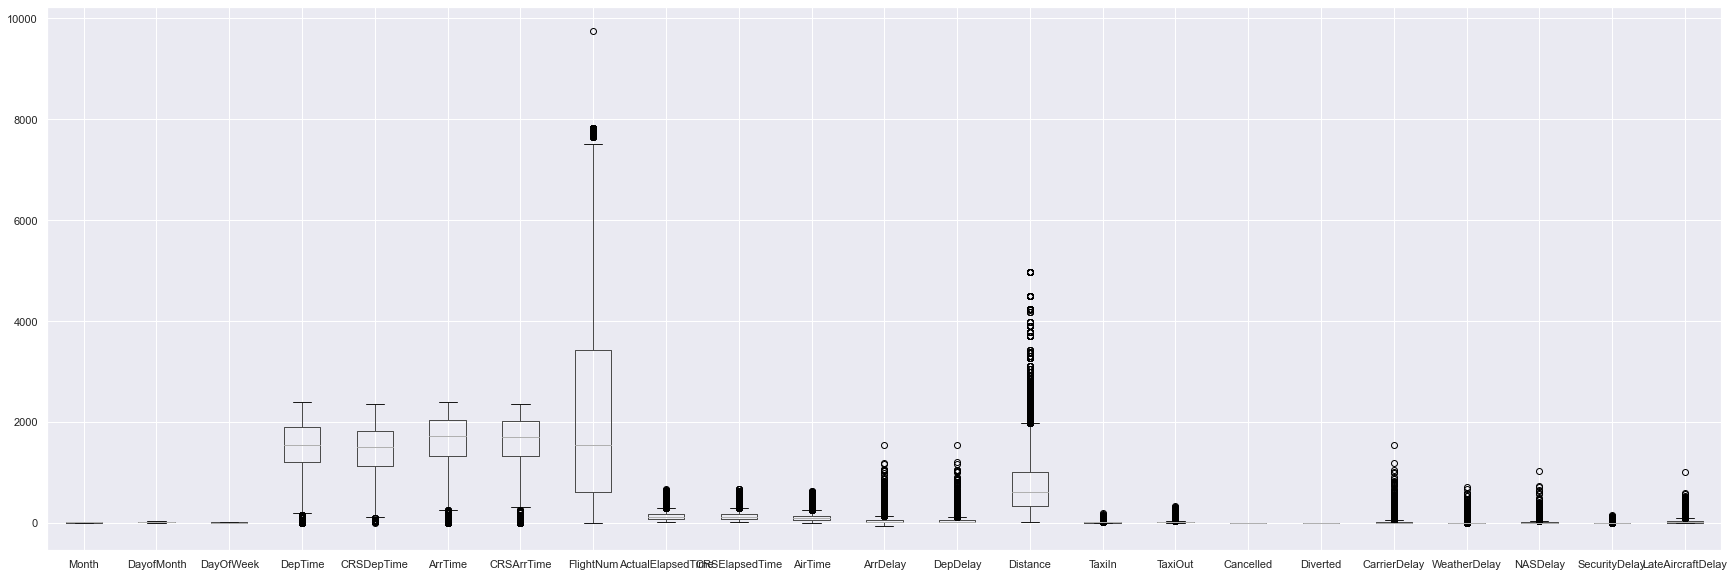

In [15]:
sns.set()
plt.figure(figsize=(30,10))
fly2.boxplot()
plt.show()

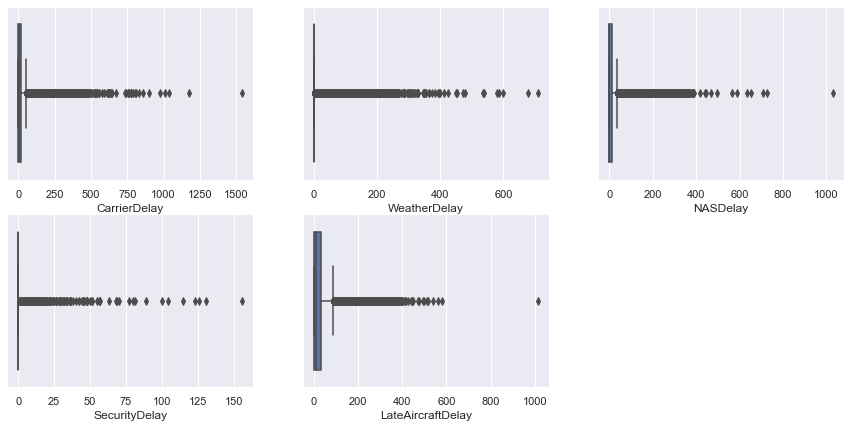

In [23]:
boxplots = ['CarrierDelay','WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']

plt.figure(figsize = (15,7))

for i, name in enumerate(boxplots):
    plt.subplot(2,3,(i+1))
    sns.boxplot(x = fly2[name])

plt.show()

Com es mostra en els gràfics anteriors les variables presenten un nombre molt alt de outliers, per tant es farà la imputació amb la mitjana. Abans de res hem de separar les variables numèriques dels strings

Per un altre banda, com es mostra a continuació, la proporció de valors en Cancelled i Diverted no es conserven en la mostra que s'ha realitzat. Per tant, en futurs anàlisis seria molt convenient conservar la proporció dels diferents casos en el mostreig. 

En aquest cas com la variable no aporta informació també serà eliminada del anàlisis

In [16]:
print(fly2['Cancelled'].value_counts())
print(fly2['Diverted'].value_counts())

0    99568
Name: Cancelled, dtype: int64
0    99568
Name: Diverted, dtype: int64


In [17]:
print(fly['Cancelled'].value_counts())
print(fly['Diverted'].value_counts())

0    1936125
1        633
Name: Cancelled, dtype: int64
0    1929004
1       7754
Name: Diverted, dtype: int64


In [18]:
fly2 = fly2.drop(['Cancelled', 'Diverted'], axis = 1)
fly2.shape

(99568, 25)

In [19]:
#Guardem el nom de les variables numèriques i categòriques per separat
numVar = ['Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime',
       'CRSArrTime', 'FlightNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay','Distance', 'TaxiIn', 'TaxiOut', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
catVar = ['UniqueCarrier', 'TailNum','Origin', 'Dest']

In [20]:
fly2Num = fly2.drop(catVar, axis = 1)
fly2Cat = fly2.drop(numVar, axis = 1)

In [58]:
fly2Num.columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime',
       'CRSArrTime', 'FlightNum', 'ActualElapsedTime', 'CRSElapsedTime',
       'AirTime', 'ArrDelay', 'DepDelay', 'Distance', 'TaxiIn', 'TaxiOut',
       'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay'],
      dtype='object')

In [21]:

from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values = np.nan, strategy = 'median')

flyTemp = imp.fit_transform(fly2Num)

fly2Num = pd.DataFrame(data = flyTemp, columns = numVar)

print(fly2Num.shape)

(99568, 21)


In [22]:
fly2Num.isna().sum()

Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
FlightNum            0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Distance             0
TaxiIn               0
TaxiOut              0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64

Hem substituit els NaNs.

En els boxplots s'observa que hi ha una gran quantitat de outliers en més de una variable i a més l'escala de les diferents variables és molt diferent. Per tant, pot ser recomenable estandaritzar o normalitzar. Per tant aplicarem a totes les variables un robustscaler

In [23]:
# Apliquem robust scaler i ho guardem en un nou dataframe

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

fly2NumTrans = scaler.fit_transform(fly2Num)

fly2NumTrans = pd.DataFrame(data = fly2NumTrans, columns = numVar)

In [62]:
fly2NumTrans.head()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,...,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1.000000,-0.666667,0.50,0.370158,0.357664,0.602797,0.475362,2.046786,1.941176,1.253012,...,0.978723,-0.333333,1.048558,-0.25,7.727273,6.9,0.0,-0.166667,0.0,-0.421053
1,-0.500000,0.466667,0.75,0.822095,-0.452555,0.735664,-0.542029,-0.506786,-0.411765,-0.277108,...,11.127660,12.761905,-0.412747,0.25,0.454545,54.1,0.0,-0.166667,0.0,-0.157895
2,-0.500000,1.000000,-0.75,0.263989,0.291971,0.145455,0.149275,0.759286,-0.800000,-0.674699,...,-0.340426,-0.071429,-0.691958,-0.75,-1.181818,0.0,0.0,0.000000,0.0,0.000000
3,-0.833333,-0.666667,0.75,-0.057389,-0.141606,-0.159441,-0.286957,1.793929,-0.729412,-0.722892,...,0.574468,0.714286,-0.704097,-0.25,0.272727,-0.2,0.0,-0.166667,0.0,2.315789
4,-0.166667,0.400000,0.00,-1.305595,-1.284672,-1.262937,-1.386957,0.113929,0.458824,0.289157,...,-0.063830,-0.404762,0.320182,-0.25,0.181818,-0.2,0.0,2.333333,7.0,-0.421053


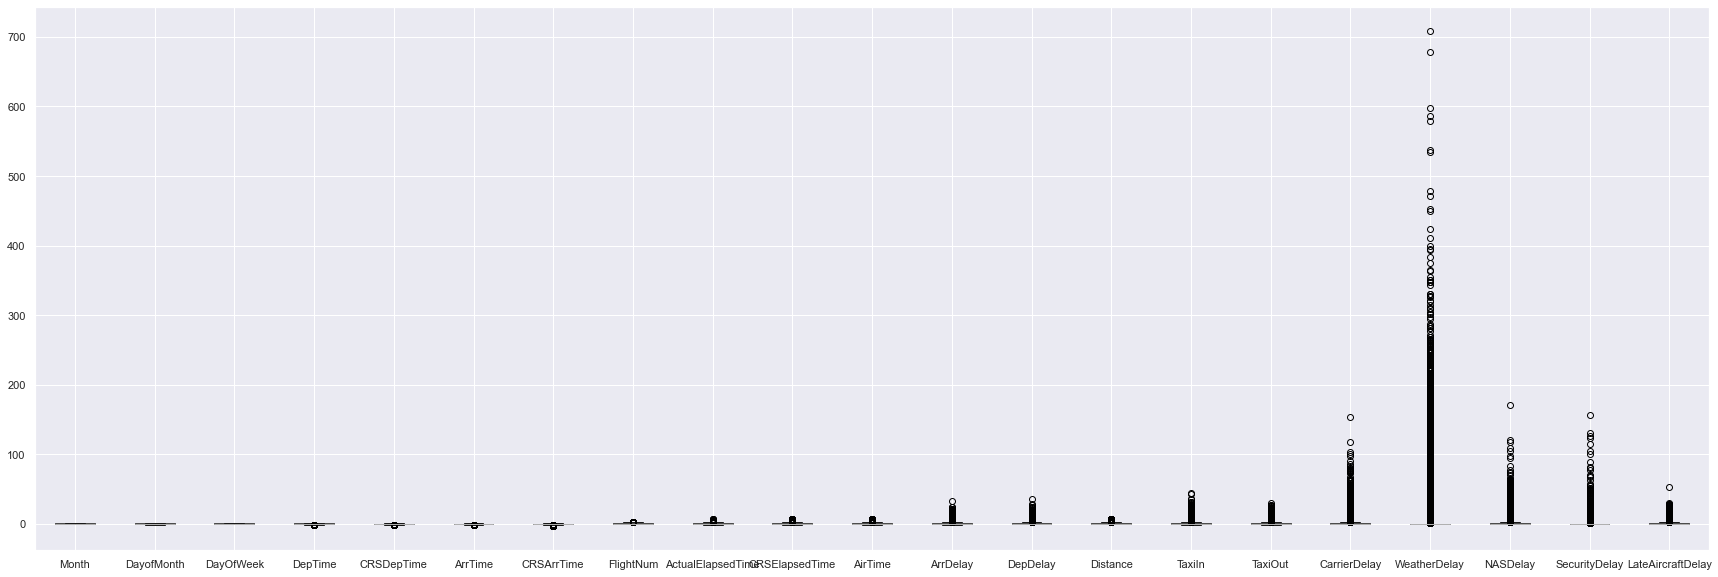

In [64]:
plt.figure(figsize=(30,10))
fly2NumTrans.boxplot()
plt.show()

Com continuen sent lea dades molt diferents d'escala entre elles es passa a normalitzar-les

In [24]:
import sklearn.preprocessing as sklp
minmax = sklp.MinMaxScaler()

fly2Norm = minmax.fit_transform(fly2NumTrans)

In [37]:
fly2Norm = pd.DataFrame(data = fly2Norm, columns = numVar)
fly2Norm

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,...,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1.000000,0.166667,0.833333,0.751980,0.743415,0.894123,0.862595,0.747510,0.410494,0.317829,...,0.078898,0.002599,0.259746,0.026882,0.289474,0.046044,0.0,0.000000,0.000000,0.000000
1,0.181818,0.733333,1.000000,0.883285,0.507647,0.933722,0.564885,0.013348,0.101852,0.120930,...,0.377583,0.359974,0.065239,0.037634,0.055556,0.352140,0.0,0.000000,0.000000,0.004941
2,0.181818,1.000000,0.000000,0.721134,0.724299,0.757816,0.767176,0.377349,0.050926,0.069767,...,0.040075,0.009747,0.028075,0.016129,0.002924,0.001297,0.0,0.000971,0.000000,0.007905
3,0.000000,0.166667,1.000000,0.627762,0.598131,0.666945,0.639525,0.674813,0.060185,0.063566,...,0.067001,0.031189,0.026459,0.026882,0.049708,0.000000,0.0,0.000000,0.000000,0.051383
4,0.363636,0.700000,0.500000,0.265110,0.265506,0.338058,0.317642,0.191806,0.216049,0.193798,...,0.048215,0.000650,0.162795,0.026882,0.046784,0.000000,0.0,0.014563,0.044872,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99563,0.363636,0.400000,0.166667,0.462276,0.443925,0.518549,0.490670,0.216963,0.123457,0.082171,...,0.063870,0.009097,0.043022,0.032258,0.049708,0.000000,0.0,0.026214,0.000000,0.019763
99564,0.454545,0.933333,1.000000,0.761984,0.698811,0.877449,0.815098,0.086867,0.219136,0.213953,...,0.098936,0.060429,0.148253,0.037634,0.061404,0.001946,0.0,0.005825,0.000000,0.092885
99565,0.818182,0.166667,0.000000,0.293039,0.276126,0.395165,0.402036,0.174556,0.231481,0.246512,...,0.034440,0.001949,0.212886,0.016129,0.067251,0.001297,0.0,0.000971,0.000000,0.007905
99566,0.000000,0.966667,0.333333,0.669446,0.645285,0.715715,0.695081,0.304754,0.179012,0.187597,...,0.058234,0.024042,0.139366,0.021505,0.038012,0.024643,0.0,0.000000,0.000000,0.000000


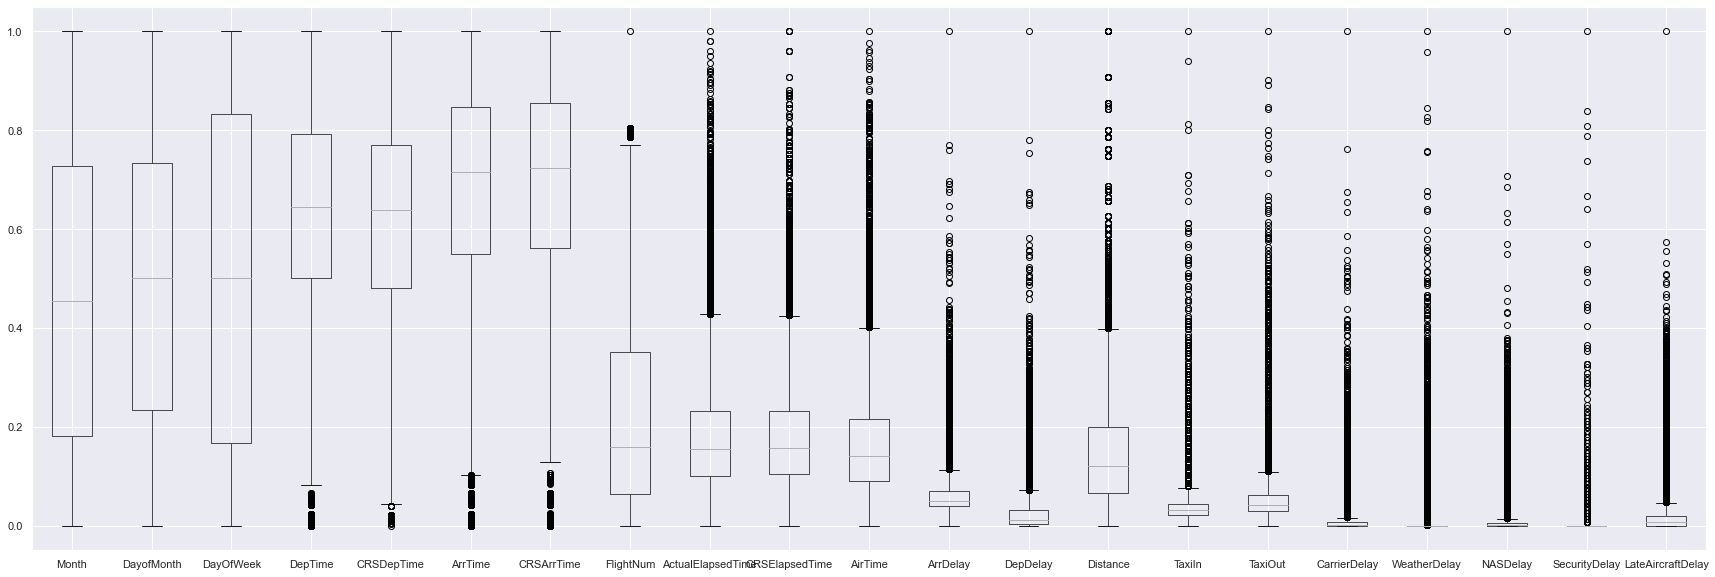

In [69]:
plt.figure(figsize = (30, 10))
fly2Norm.boxplot()
plt.show()

Es evident que encara s'arrosseguen molts outliers que no es poden eliminar però han sigut tractats en la mesura de lo possible amb RobustScaler i s'han escalat tots els valors entre 0 i 1. 



Un cop s'ha treballat amb tota la part numèrica es passa a treballar amb la part categòrica

In [25]:
fly2Cat.head()

,UniqueCarrier,TailNum,Origin,Dest
1782417,YV,N505MJ,IAD,AUS
512712,NW,N777NC,ORD,MSP
447137,OO,N224SW,SLC,PIH
55082,OO,N708SK,HDN,DEN
877634,CO,N16646,JAX,IAH


Per a fer el dummies s'utilitzaran esl següents prefixos per fer referència a les variables originals:
* UniqueCarrier: UC-
* TailNum: TN-
* Origin: O-
* Dest: D-

In [26]:
fly2Dummies = pd.get_dummies(data = fly2Cat, prefix = ['UC-', 'TN-', 'O-', 'D-'])

In [27]:
fly2Dummies.head()

,UC-_9E,UC-_AA,UC-_AQ,UC-_AS,UC-_B6,UC-_CO,UC-_DL,UC-_EV,UC-_F9,UC-_FL,...,D-_TXK,D-_TYR,D-_TYS,D-_VLD,D-_VPS,D-_WRG,D-_XNA,D-_YAK,D-_YKM,D-_YUM
1782417,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
512712,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
447137,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55082,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
877634,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
fly2Dummies.tail()

,UC-_9E,UC-_AA,UC-_AQ,UC-_AS,UC-_B6,UC-_CO,UC-_DL,UC-_EV,UC-_F9,UC-_FL,...,D-_TXK,D-_TYR,D-_TYS,D-_VLD,D-_VPS,D-_WRG,D-_XNA,D-_YAK,D-_YKM,D-_YUM
764022,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
988054,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1623497,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
139908,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
195101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
fly2Dummies.shape

(99568, 5811)

In [30]:
n = fly2Dummies.isna().sum()

In [31]:
n2 = n > 0

In [32]:
n2.value_counts()

False    5811
dtype: int64

Ara passem a unir tots dos dataframes

In [33]:
print(fly2Norm.shape)
print(fly2Dummies.shape)

(99568, 21)
(99568, 5811)


In [38]:
flyTot = pd.concat([fly2Norm, fly2Dummies], axis = 1)


axis 1 5201, 194074
axis 0 5201, 99568

In [39]:
print(flyTot.head())
print(flyTot.shape)

      Month  DayofMonth  DayOfWeek   DepTime  CRSDepTime   ArrTime  \
0  1.000000    0.166667   0.833333  0.751980    0.743415  0.894123   
1  0.181818    0.733333   1.000000  0.883285    0.507647  0.933722   
2  0.181818    1.000000   0.000000  0.721134    0.724299  0.757816   
3  0.000000    0.166667   1.000000  0.627762    0.598131  0.666945   
4  0.363636    0.700000   0.500000  0.265110    0.265506  0.338058   

   CRSArrTime  FlightNum  ActualElapsedTime  CRSElapsedTime  ...  D-_TXK  \
0    0.862595   0.747510           0.410494        0.317829  ...     NaN   
1    0.564885   0.013348           0.101852        0.120930  ...     NaN   
2    0.767176   0.377349           0.050926        0.069767  ...     NaN   
3    0.639525   0.674813           0.060185        0.063566  ...     NaN   
4    0.317642   0.191806           0.216049        0.193798  ...     NaN   

   D-_TYR  D-_TYS  D-_VLD  D-_VPS  D-_WRG  D-_XNA  D-_YAK  D-_YKM  D-_YUM  
0     NaN     NaN     NaN     NaN     NaN     

In [86]:
print(fly2Norm.shape)
print(fly2Dummies.shape)

(99568, 21)
(99568, 5811)


In [87]:
194074-99568

94506



## Divisió de les dades

Fins que es puguin unir els dos dataframes de moment només treballarem amb dades quantitatives

In [43]:
from sklearn.model_selection import train_test_split

x = fly2Norm.drop('ArrDelay', axis = 1)
y = fly2Norm.loc[:,'ArrDelay']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, train_size = 0.7)

In [44]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(69697, 20) (29871, 20) (69697,) (29871,)


### Regressió múltiple

In [45]:
#Regressió múltiple

from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(x_train, y_train)


In [47]:
print('R^2: ', model.score(x_train, y_train))

R^2:  1.0


### Decision tree

In [48]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=0)

tree = regressor.fit(x_train,y_train)

In [51]:
tree.score(x_test, y_test)

0.9869825622343482

### LASSO

In [54]:
from sklearn.linear_model import LassoCV
modelL = LassoCV()
lasso = modelL.fit(x_train, y_train)

C:\Users\Guillermo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.08165530861596021, tolerance: 0.00853527719633003
  model = cd_fast.enet_coordinate_descent(




## Exercici 2

Compara’ls en base al MSE i al R2 .


In [55]:
print('R^2')
print('Regressió múltiple:')
print('  train: ', model.score(x_train, y_train))
print('  test: ', model.score(x_test, y_test))
print()
print('Decision tree:')
print('  train: ', tree.score(x_train, y_train))
print('  test: ', tree.score(x_test, y_test))
print()
print('LASSO')
print('  train: ', lasso.score(x_train, y_train))
print('  test: ', lasso.score(x_test, y_test))


R^2
Regressió múltiple:
  train:  1.0
  test:  1.0

Decision tree:
  train:  1.0
  test:  0.9869825622343482

LASSO
  train:  0.9999909841648112
  test:  0.9999914901398274


In [59]:
print('MSE')
from sklearn.metrics import mean_squared_error
import math

print('Regressió múltiple:')
lm_yPredict = model.predict(x_test)
MSE_lm = mean_squared_error(y_test, lm_yPredict)
print('  MSE: ', MSE_lm)
print('  RMSE: ', math.sqrt(MSE_lm))
print()

print('Decision tree:')
dt_yPredict = tree.predict(x_test)
MSE_dt = mean_squared_error(y_test, dt_yPredict)
print('  MSE: ', MSE_dt)
print('  RMSE: ', math.sqrt(MSE_dt))
print()

print('LASSO')
lasso_yPredict = lasso.predict(x_test)
MSE_lasso = mean_squared_error(y_test, lasso_yPredict)
print('  MSE: ', MSE_lasso)
print('  RMSE: ', math.sqrt(MSE_lasso))

MSE
Regressió múltiple:
  MSE:  1.0640575562541264e-32
  RMSE:  1.0315316554784571e-16

Decision tree:
  MSE:  1.6861353503914926e-05
  RMSE:  0.004106257846740134

LASSO
  MSE:  1.1022734521377682e-08
  RMSE:  0.00010498921145230915


Tant en $R^2$ com en MSE donen molt bon resultat. $R^2$ presenta un ajust molt bo sent de 1 en el train i de 1 o 0.9 en el test. Mentre que el MSE també dona resultats molt bons al ser la distància entre les dades predites i les reals. Tot i així, que les dades encaixin tan bé fa molt probable que estem davant d'una situació de overfitting que convé evitar.

Per un altre costat, que Lasso baixi la predicció en relació a la resta de models pot ser donat perquè està pensat per utilitzar en variables amb una elevada correlació entre elles. Fet que no passa en aquest cas.

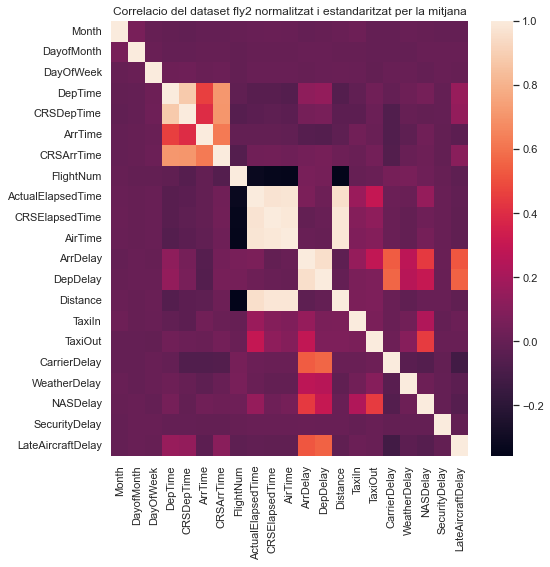

In [62]:
plt.figure(figsize=(8,8))
sns.heatmap(fly2Norm.corr())
plt.title('Correlacio del dataset fly2 normalitzat i estandaritzat per la mitjana')
plt.show()

## Exercici 3

Entrena’ls utilitzant els diferents paràmetres que admeten.

In [65]:
#Regressió múltiple

from sklearn.linear_model import LinearRegression

model2 = LinearRegression(fit_intercept = False).fit(x_train, y_train)


print('  train: ', model2.score(x_train, y_train))
print('  test: ', model2.score(x_test, y_test))

  train:  1.0
  test:  1.0


In [66]:
model3 = LinearRegression(normalize = True).fit(x_train, y_train)


print('  train: ', model3.score(x_train, y_train))
print('  test: ', model3.score(x_test, y_test))

  train:  1.0
  test:  1.0


In [68]:
#Decision tree

regressor2 = DecisionTreeRegressor(random_state=0, splitter = 'random')

tree2 = regressor2.fit(x_train,y_train)

print('  train: ', tree2.score(x_train, y_train))
print('  test: ', tree2.score(x_test, y_test))
print()

  train:  1.0
  test:  0.9830402096832789



In [75]:
regressor3 = DecisionTreeRegressor(random_state=0, max_depth = 4)

tree3 = regressor3.fit(x_train,y_train)

print('  train: ', tree3.score(x_train, y_train))
print('  test: ', tree3.score(x_test, y_test))
print()

  train:  0.9304811156838645
  test:  0.9274188245364735



In [77]:
#LASSO
modelL2 = LassoCV(n_alphas = 4)
lasso2 = modelL2.fit(x_train, y_train)

print('  train: ', lasso2.score(x_train, y_train))
print('  test: ', lasso2.score(x_test, y_test))

  train:  0.9999909841648112
  test:  0.9999914901398274


C:\Users\Guillermo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.08165530861596021, tolerance: 0.00853527719633003
  model = cd_fast.enet_coordinate_descent(


In [78]:
modelL3 = LassoCV(max_iter = 10000)
lasso3 = modelL3.fit(x_train, y_train)

print('  train: ', lasso3.score(x_train, y_train))
print('  test: ', lasso3.score(x_test, y_test))

  train:  0.9999911964785768
  test:  0.9999917006714631


Després de modificar diferents paràmetres s'observa que no es produeixen grans variacions. Sent el cas més evident l'arbre de decisió al modificar la seva profunditat màxima

## Exercici 4

Compara el seu rendiment utilitzant l’aproximació traint/test o utilitzant totes les dades (validació interna)

In [82]:
#Es mesura el rendiment per aproximació train/test
import sklearn.metrics as skm

print('LM: ', skm.r2_score(y_test, lm_yPredict))
print('Decision tree: ', skm.r2_score(y_test, dt_yPredict))
print('LASSO: ', skm.r2_score(y_test, lasso_yPredict))


LM:  1.0
Decision tree:  0.9869825622343482
LASSO:  0.9999914901398274


In [85]:
#Explained variance score

print('LM: ', skm.explained_variance_score(y_test, lm_yPredict))
print('Decision tree: ', skm.explained_variance_score(y_test, dt_yPredict))
print('LASSO: ', skm.explained_variance_score(y_test, lasso_yPredict))

LM:  1.0
Decision tree:  0.9869911695478647
LASSO:  0.9999914907561249


En tots els casos i com les valoracions anteriors tots tres models donen coeficients molt grans donant a entendre que existeix overfitting.